# Assignment 1-MeifangLi(13043390)

- Problem 1.1 

In [1]:
import scipy.integrate
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.optimize import fsolve

In [2]:
# The naive SIR model differential equations.
def SIRmodel_naive(y,t,beta,gamma):
    S,I,R=y
    dSdt=-beta*S*I
    dIdt=beta*S*I-gamma*I
    dRdt=gamma*I
    return([dSdt,dIdt,dRdt])

In [3]:
S0=0.85
I0=0.15
R0=0
y0=[S0,I0,R0]
beta=0.25
gamma=0.05

t = np.linspace(0, 100, 100000)

In [4]:
#odeint(fuction,initial value,x variables,parameters)
solution=scipy.integrate.odeint(SIRmodel_naive,y0,t,args=(beta,gamma))
S, I, R= solution.T

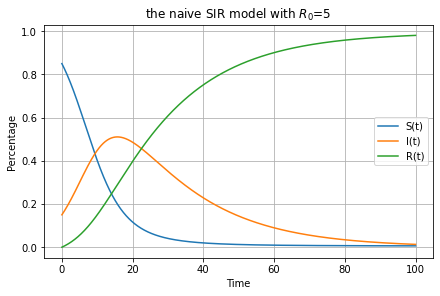

In [5]:
plt.figure(figsize=(6, 4),constrained_layout=True)
plt.plot(t,S ,label='S(t)')
plt.plot(t,I ,label='I(t)')
plt.plot(t,R ,label='R(t)')
plt.title('the naive SIR model with $R_0$=5')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [6]:
S0=0.85
I0=0.15
R0=0
y0=[S0,I0,R0]
beta=0.02
gamma=0.4

t = np.linspace(0, 100, 100000)

In [7]:
#odeint(fuction,initial value,x variables,parameters)
solution=scipy.integrate.odeint(SIRmodel_naive,y0,t,args=(beta,gamma))
S, I, R= solution.T

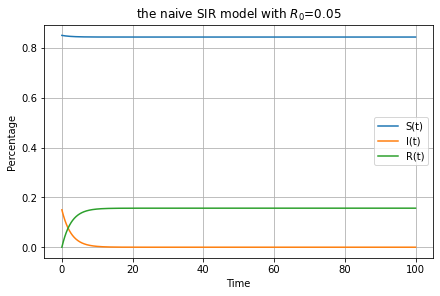

In [8]:
plt.figure(figsize=(6, 4),constrained_layout=True)
plt.plot(t,S ,label='S(t)')
plt.plot(t,I ,label='I(t)')
plt.plot(t,R ,label='R(t)')
plt.title('the naive SIR model with $R_0$=0.05')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [9]:
#define a function to solve R(Infinity)
def RInf(R_infinity,S0,R0):
    return 1-R_infinity-S0*np.power(np.e, -R_infinity*R0)

In [10]:
S0=0.999999
R0=np.arange(0,5,0.01)
Sol=fsolve(RInf, R0, args=(S0,R0))

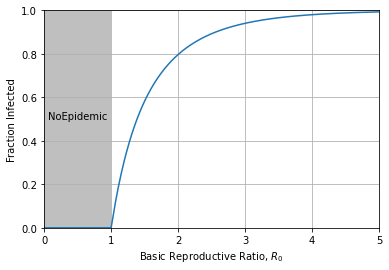

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(R0,Sol)
plt.xlabel('Basic Reproductive Ratio, $R_0$')
plt.ylabel('Fraction Infected')
plt.axvspan(0, 1, facecolor='gray', alpha=0.5)
plt.text(0.05, 0.5, r'NoEpidemic', fontsize=10)
plt.xlim(0,5)
plt.ylim(0,1)
plt.grid()
plt.show()

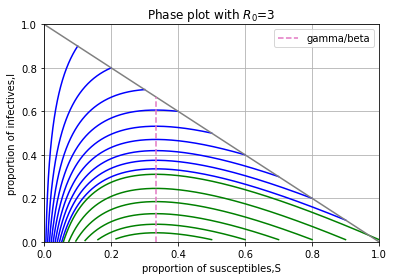

In [12]:
#Phase plot with R0>1
beta=0.3
gamma=0.1

R0=beta/gamma
#plot I+S=1 
for i in np.arange(1.0,0,-0.1):
    S0=i
    I0=1-i
    t=np.linspace(0,100,10000)
    y0=[S0,I0,0]
    plt.plot(y0[0],y0[1])
    solution=scipy.integrate.odeint(SIRmodel_naive,y0,t,args=(beta,gamma))
    S, I, R= solution.T
    plt.plot(S,I,'blue')

#plot s=i i=0.01
for i in np.arange(1.0,0.4,-0.1):
    S0=i
    I0=0.01
    t=np.linspace(0,100,10000)
    y0=[S0,I0,0]
    plt.plot(y0[0],y0[1])
    solution=scipy.integrate.odeint(SIRmodel_naive,y0,t,args=(beta,gamma))
    S, I, R= solution.T
    plt.plot(S,I,'green')
    
s=np.arange(1,-0.1,-0.1)
i=-s+1
plt.plot(s,i,'gray')
plt.plot([1/(beta/gamma),1/(beta/gamma)],[0,1-gamma/beta],'--',label="gamma/beta")
plt.xlabel('proportion of susceptibles,S')
plt.ylabel('proportion of infectives,I')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.legend(loc="best")
plt.title('Phase plot with $R_0$=3')
plt.show()

- Problem 1.2

In [13]:
N = 763
I0 = 1
R0 = 0
S0 = N - I0 - R0

Number = np.array([3,8,28,75,221,291,255,235,190,125,70,28,12,5])
day = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])

#define estimated parameters
beta = 1.66
gamma = 1/2.2

In [14]:
#define SIR model
def SIR_Model(Y,day,beta,gamma):
    S,I,R = Y
    dSdt = -beta*S*I/N
    dIdt = beta*S*I/N - gamma*I
    dRdt = gamma*I
    return[dSdt,dIdt,dRdt]

#define SIR_I
def SIR_I(day,beta,gamma):
    Y = [762, 1, 0]
    solution = scipy.integrate.odeint(SIR_Model , Y, day,args=(beta,gamma))
    S, I ,R = solution.T
    return I

In [15]:
#use curve_fit fuction
pars, cov = curve_fit(f=SIR_I, xdata=day, ydata=Number, p0=[0, 0], bounds=(-np.inf, np.inf))

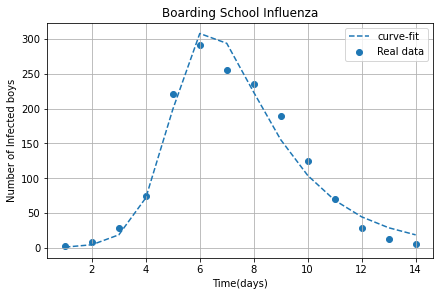

In [16]:
plt.figure(figsize=(6, 4),constrained_layout=True)
plt.scatter(day,Number,label='Real data')
plt.plot(day, SIR_I(day, *pars), '--',label="curve-fit")
plt.title('Boarding School Influenza')
plt.xlabel('Time(days)')
plt.ylabel('Number of Infected boys')
plt.legend(loc='best')
plt.grid()
plt.show()

- Problem 1.3

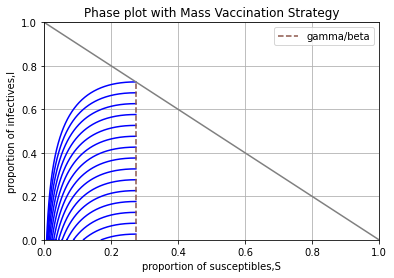

In [17]:
#Phase plot with R0>1 and vaccinated
N=763
beta=1.66
gamma=1/2.2

#using Mass vaccination strategy 
p=1-1/(beta/gamma)
max_suspectible= N-p*N

#plot I+S+R=1 
for i in np.arange(p,0,-0.05):
    S0=1/(beta/gamma)
    I0=i
    R0=1-i-1/(beta/gamma)
    t=np.linspace(0,100,10000)
    y0=[S0,I0,R0]
    plt.plot(y0[0],y0[1])
    solution=scipy.integrate.odeint(SIRmodel_naive,y0,t,args=(beta,gamma))
    S, I, R= solution.T
    plt.plot(S,I,'blue')
        
s=np.arange(1,-0.1,-0.1)
i=-s+1
plt.plot(s,i,'gray')
plt.plot([1/(beta/gamma),1/(beta/gamma)],[0,p],'--',label="gamma/beta")
plt.xlabel('proportion of susceptibles,S')
plt.ylabel('proportion of infectives,I')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.legend(loc='best')
plt.title('Phase plot with Mass Vaccination Strategy')
plt.show()

- Problem 2.1

In [18]:
# The SIR model with demography differential equations.
def SIRmodel_demography(y,t,beta,gamma,mu):
    S,I,R=y
    dSdt= mu - beta*S*I - mu*S
    dIdt= beta*S*I - gamma*I- mu*I
    dRdt= gamma*I - mu*R
    return([dSdt,dIdt,dRdt])

In [19]:
beta = 1
gamma = 1/3
mu = 1/60
y=[1-0.00025, 0.00025, 0]
#first in the intial time, second is end time, and the thrid one is time interval
t=np.arange(0,300,0.01)

In [20]:
#odeint(fuction,initial value,x variables,parameters)
solution=scipy.integrate.odeint(SIRmodel_demography,y,t,args=(beta,gamma,mu))
S, I, R= solution.T

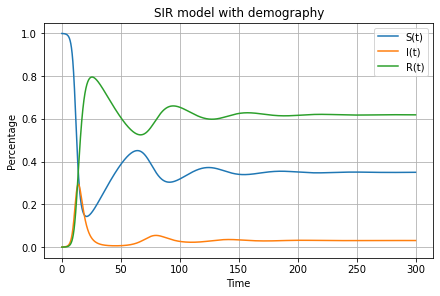

In [21]:
plt.figure(figsize=(6, 4),constrained_layout=True)
plt.plot(t,S ,label='S(t)')
plt.plot(t,I ,label='I(t)')
plt.plot(t,R ,label='R(t)')
plt.title('SIR model with demography')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [22]:
from scipy import fftpack

Text(0.5, 1.0, 'Fourier Analysis')

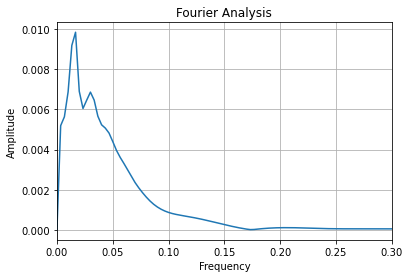

In [23]:
time_step = 0.01
t=np.arange(0,300,time_step)


# The FFT of the I(t)
I_fft = fftpack.fft(I-np.mean(I))
# FFT return the Normlized magnitute of wave of each freq
normalized_I_fft = abs(I_fft)/len(t)
# The corresponding frequencies
X_freq = fftpack.fftfreq(normalized_I_fft.size, d=time_step)
# Plot the FFT 
plt.figure(figsize=(6, 4))
plt.plot(X_freq[0:300], normalized_I_fft[0:300])
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0,0.3)
plt.grid()
plt.title("Fourier Analysis")

In [24]:
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(X_freq > 0)
freqs = X_freq[pos_mask]
peak_freq = freqs[normalized_I_fft[pos_mask].argmax()]

In [25]:
print("Frequency Peak:",peak_freq)

Frequency Peak: 0.016666666666666666


In [26]:
beta = 1/6
gamma = 1/3
mu = 1/60
y=[1-0.00025, 0.00025, 0]
#first in the intial time, second is end time, and the thrid one is time interval
t=np.arange(0,300,0.01)

In [27]:
#odeint(fuction,initial value,x variables,parameters)
solution=scipy.integrate.odeint(SIRmodel_demography,y,t,args=(beta,gamma,mu))
S, I, R= solution.T

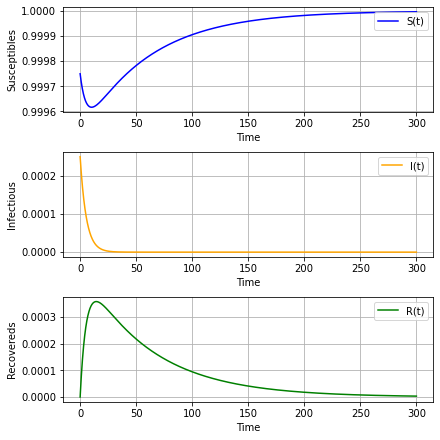

In [28]:
fig, axs = plt.subplots(3, 1, figsize=(6, 6),constrained_layout=True)
axs[0].plot(t,S ,'blue',label='S(t)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Susceptibles')
axs[0].legend(loc='upper right',prop={'size': 10})
axs[0].grid()

axs[1].plot(t,I ,'orange',label='I(t)')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Infectious')
axs[1].legend(loc='upper right',prop={'size': 10})
axs[1].grid()

axs[2].plot(t,R ,'green',label='R(t)')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Recovereds')
axs[2].legend(loc='upper right',prop={'size': 10})
axs[2].grid()

plt.show()

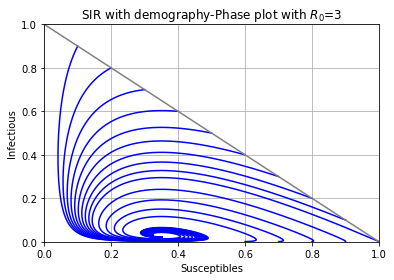

In [29]:
#SIR with demography-Phase plot with R0>1
beta = 1
gamma = 1/3
mu = 1/60

R0=beta/(gamma+mu)
#plot I+S=1 
for i in np.arange(1.0,0,-0.1):
    S0=i
    I0=1-i
    t=np.linspace(0,100,10000)
    y0=[S0,I0,0]
    plt.plot(y0[0],y0[1])
    solution=scipy.integrate.odeint(SIRmodel_demography,y0,t,args=(beta,gamma,mu))
    S, I, R= solution.T
    plt.plot(S,I,'blue')

#plot s=i i=0.001
for i in np.arange(1.0,0.5,-0.1):
    S0=i
    I0=0.001
    t=np.linspace(0,100,10000)
    y0=[S0,I0,0]
    plt.plot(y0[0],y0[1])
    solution=scipy.integrate.odeint(SIRmodel_demography,y0,t,args=(beta,gamma,mu))
    S, I, R= solution.T
    plt.plot(S,I,'blue')
    
s=np.arange(1,-0.1,-0.1)
i=-s+1
plt.plot(s,i,'gray')
plt.xlabel('Susceptibles')
plt.ylabel('Infectious')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.title('SIR with demography-Phase plot with $R_0$=3')
plt.show()

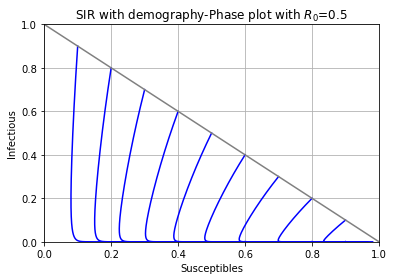

In [30]:
#Phase plot with R0<1
beta=1
gamma=2
mu = 1/60

R0=beta/(gamma+mu)
#plot I+S=1 
for i in np.arange(1.0,0,-0.1):
    S0=i
    I0=1-i
    t=np.linspace(0,100,10000)
    y0=[S0,I0,0]
    plt.plot(y0[0],y0[1])
    solution=scipy.integrate.odeint(SIRmodel_demography,y0,t,args=(beta,gamma,mu))
    S, I, R= solution.T
    plt.plot(S,I,'blue')
    
#plot s=i i=0.001
for i in np.arange(1.0,0.5,-0.1):
    S0=i
    I0=0.001
    t=np.linspace(0,100,10000)
    y0=[S0,I0,0]
    plt.plot(y0[0],y0[1])
    solution=scipy.integrate.odeint(SIRmodel_demography,y0,t,args=(beta,gamma,mu))
    S, I, R= solution.T
    plt.plot(S,I,'blue')
    
s=np.arange(1,-0.1,-0.1)
i=-s+1
plt.plot(s,i,'gray')
plt.xlabel('Susceptibles')
plt.ylabel('Infectious')
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.title('SIR with demography-Phase plot with $R_0$=0.5')
plt.show()

- Problem 2.2

In [31]:
# The SIR model with disease induced morality-Density dependent transmission
# We assume birth rate is equal to natural death rate: \upsilon =\mu
def SIRmodel_moralityD(y,t,beta,gamma,mu,rho):
    X,Y,Z=y
    dXdt= mu - beta*X*Y - mu*X
    dYdt= beta*X*Y - (gamma+mu)*Y/(1-rho)
    dZdt= gamma*Y - mu*Z
    return([dXdt,dYdt,dZdt])

In [32]:
rho=0.5
mu=1/60
beta=1
gamma=1/3

X0=1
Y0=0.0001

y=[X0,Y0,0]

t=np.arange(0,250,0.01)

0.25
0.5
0.75


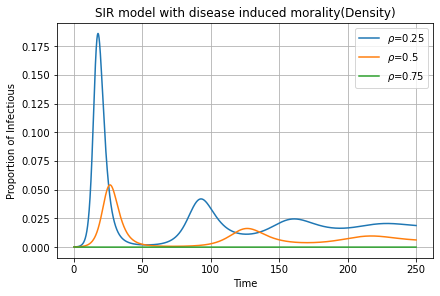

In [33]:
plt.figure(figsize=(6, 4),constrained_layout=True)
for rho in np.linspace(0.25,0.75,3):
    print(rho)
    #odeint(fuction,initial value,x variables,parameters))
    solution=scipy.integrate.odeint(SIRmodel_moralityD,y,t,args=(beta,gamma,mu,rho))
    S, I, R= solution.T
    plt.plot(t,solution[:,1] ,label=r'$\rho$'+'='+str(rho))
    plt.legend(loc='best')
    plt.title('SIR model with disease induced morality(Density)')
plt.xlabel('Time')
plt.ylabel('Proportion of Infectious')
plt.grid()
plt.show()

In [34]:
# The SIR model with disease induced morality-Frequency dependent transmission
# We assume birth rate is equal to natural death rate: \upsilon =\mu
def SIRmodel_moralityF(y,t,beta,gamma,mu,rho):
    X,Y,Z=y
    dXdt= mu - beta*X*Y/sum(y) - mu*X
    dYdt= beta*X*Y/sum(y) - (gamma+mu)*Y/(1-rho)
    dZdt= gamma*Y - mu*Z
    return([dXdt,dYdt,dZdt])

In [35]:
rho=0.5
mu=1/60
beta=1
gamma=1/3

X0=1
Y0=0.0001

y=[X0,Y0,0]

t=np.arange(0,250,0.01)

0.25
0.5
0.75


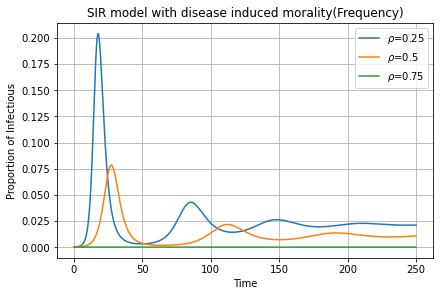

In [36]:
plt.figure(figsize=(6, 4),constrained_layout=True)
for rho in np.linspace(0.25,0.75,3):
    print(rho)
    #odeint(fuction,initial value,x variables,parameters)
    solution=scipy.integrate.odeint(SIRmodel_moralityF,y,t,args=(beta,gamma,mu,rho))
    S, I, R= solution.T
    plt.plot(t,solution[:,1] ,label=r'$\rho$'+'='+str(rho))
    plt.legend(loc='best')
    plt.title('SIR model with disease induced morality(Frequency)')
plt.xlabel('Time')
plt.ylabel('Proportion of Infectious')
plt.grid()
plt.show()

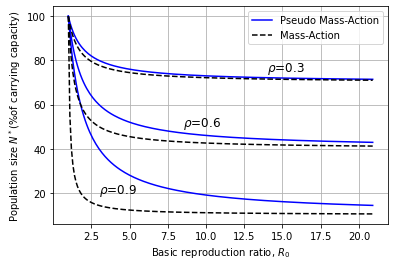

In [37]:
R0=np.arange(1,21,0.1)
rho1=0.3
rho2=0.6
rho3=0.9
#using N* equation and assuming birth rate equal to natural death rate
N_Den_rho1=(1+(1-rho1)*(R0-1))/R0
N_Den_rho2=(1+(1-rho2)*(R0-1))/R0
N_Den_rho3=(1+(1-rho3)*(R0-1))/R0
#using N* equation and assuming birth rate equal to natural death rate
N_Fre_rho1=R0*(1-rho1)/(R0-rho1)
N_Fre_rho2=R0*(1-rho2)/(R0-rho2)
N_Fre_rho3=R0*(1-rho3)/(R0-rho3)

plt.plot(R0,N_Den_rho1*100,'blue',label="Pseudo Mass-Action")
plt.plot(R0,N_Den_rho2*100,'blue')
plt.plot(R0,N_Den_rho3*100,'blue')
plt.plot(R0,N_Fre_rho1*100,'k--',label="Mass-Action")
plt.plot(R0,N_Fre_rho2*100,'k--')
plt.plot(R0,N_Fre_rho3*100,'k--')
plt.xlabel('Basic reproduction ratio, '+'$R_0$')
plt.ylabel('Population size '+'$N^*$'+'(%of carrying capacity)')
plt.text(3,20,r'$\rho$'+'=0.9',fontsize=12)
plt.text(8.5,50,r'$\rho$'+'=0.6',fontsize=12)
plt.text(14,75,r'$\rho$'+'=0.3',fontsize=12)
plt.legend(loc='best')
plt.grid()
plt.show()

- Problem 3

In [38]:
# The SEIR model 
def SEIRmodel(y,t,beta,gamma,mu,sigma):
    S,E,I,R=y
    dSdt= mu - (beta*I+mu)*S
    dEdt= beta*S*I-(mu+sigma)*E
    dIdt= sigma*E - (gamma+mu)*I
    dRdt= gamma*I - mu*R
    return([dSdt,dEdt,dIdt,dRdt])

In [39]:
mu=1/60
beta=1
gamma=1/3
sigma=1/10

X0=0.9998
Y0=0.0001
Z0=0.0001

y0=[X0,Y0,Z0,0]

t=np.arange(0,400,0.01)

In [40]:
#odeint(fuction,initial value,x variables,parameters)
solution=scipy.integrate.odeint(SEIRmodel,y0,t,args=(beta,gamma,mu,sigma))
S, E, I, R= solution.T

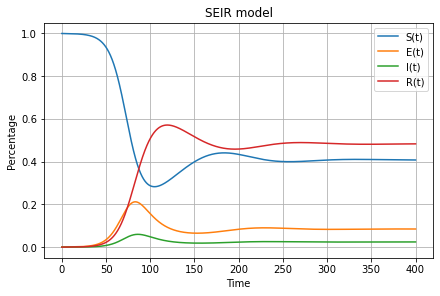

In [41]:
plt.figure(figsize=(6, 4),constrained_layout=True)
plt.plot(t,S ,label='S(t)')
plt.plot(t,E ,label='E(t)')
plt.plot(t,I ,label='I(t)')
plt.plot(t,R ,label='R(t)')
plt.title('SEIR model')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend(loc='best')
plt.grid()
plt.show()

In [42]:
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


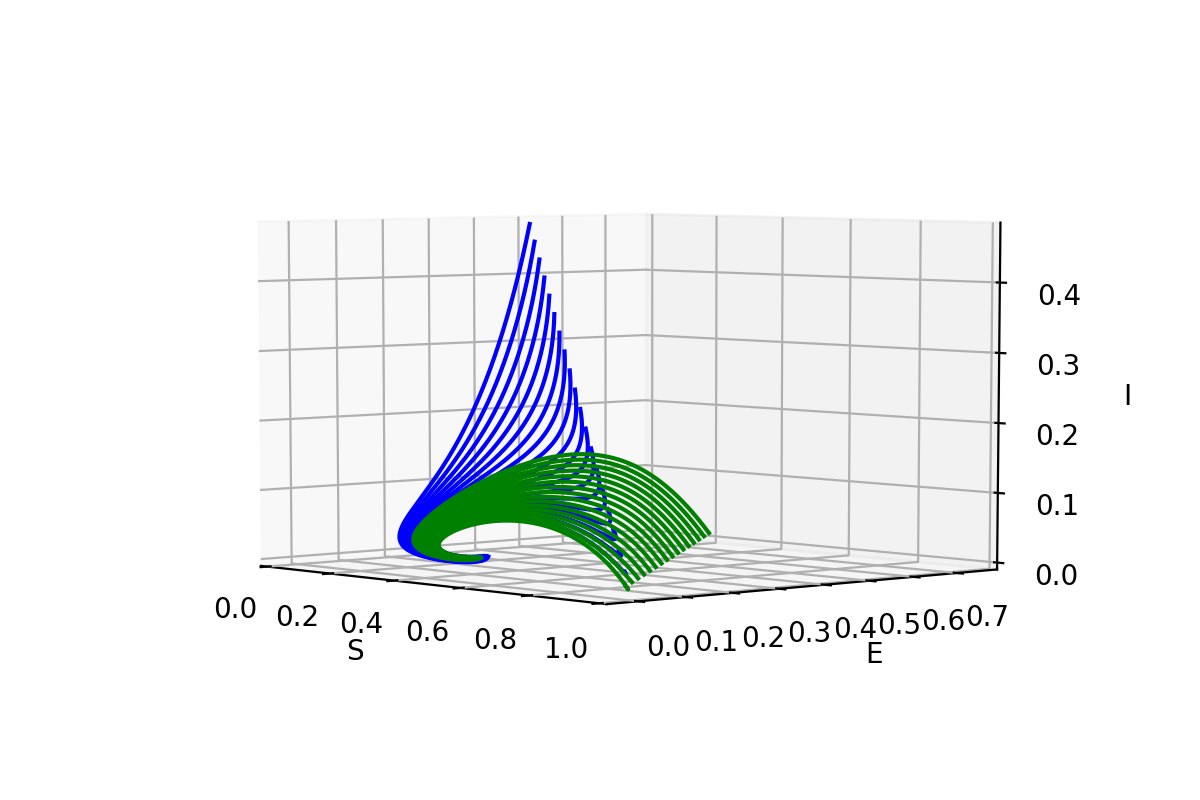

In [43]:
#Phase plot with SEIR model
mu=1/60
beta=1
gamma=1/3
sigma=1/10

fig =plt.figure(figsize=(6,4))
ax=plt.axes(projection='3d')
ax.view_init(5,-42)
ax.set_xlabel('S')
ax.set_ylabel('E')
ax.set_zlabel('I') 
ax.set_xlim(0,1)
#plot I+S+E=1 
for i in np.arange(1.0,0,-0.05):
    S0=i
    I0=(1-i)/2
    E0=(1-i)/2
    t=np.linspace(0,100,10000)
    y0=[S0,E0,I0,0]
    solution=scipy.integrate.odeint(SEIRmodel,y0,t,args=(beta,gamma,mu,sigma))
    S, E, I, R= solution.T
    ax.plot(S,E,I,'blue')

#plot I+S+E=1
for i in np.arange(1.0,0.2,-0.05):
    S0=i
    I0=0.01
    E0=1-i-0.01
    t=np.linspace(0,100,10000)
    y0=[S0,E0,I0,0]
    solution=scipy.integrate.odeint(SEIRmodel,y0,t,args=(beta,gamma,mu,sigma))
    S, E, I, R= solution.T
    ax.plot(S,E,I,'green')

In [44]:
import math

In [45]:
#Add seasonal effect to SEIR model
S0=0.06
E0=I0=0.001
R0=1-S0-E0-I0
mu=1/60
gamma=1/3
sigma=1/10
beta0=1.5
beta1=0.5
omega=2*np.pi/365

t=np.arange(0,1000,0.01)

#transmission rate is a function of time
def beta(beta0,beta1,omega,t):
    return(beta0*(1+beta1*math.cos(omega*t)))

def SEIRmodel_seasonal(y,t,mu,gamma,sigma,beta0,beta1):
    S,E,I,R=y
    dSdt= mu - beta(beta0,beta1,omega,t)*S*I-mu*S
    dEdt= beta(beta0,beta1,omega,t)*S*I-(mu+sigma)*E
    dIdt= sigma*E - (gamma+mu)*I
    dRdt= gamma*I - mu*R
    return([dSdt,dEdt,dIdt,dRdt])

In [46]:
#odeint(fuction,initial value,x variables,parameters)
solution=scipy.integrate.odeint(SEIRmodel_seasonal,y0,t,args=(mu,gamma,sigma,beta0,beta1))
S, E, I, R= solution.T

<IPython.core.display.Javascript object>


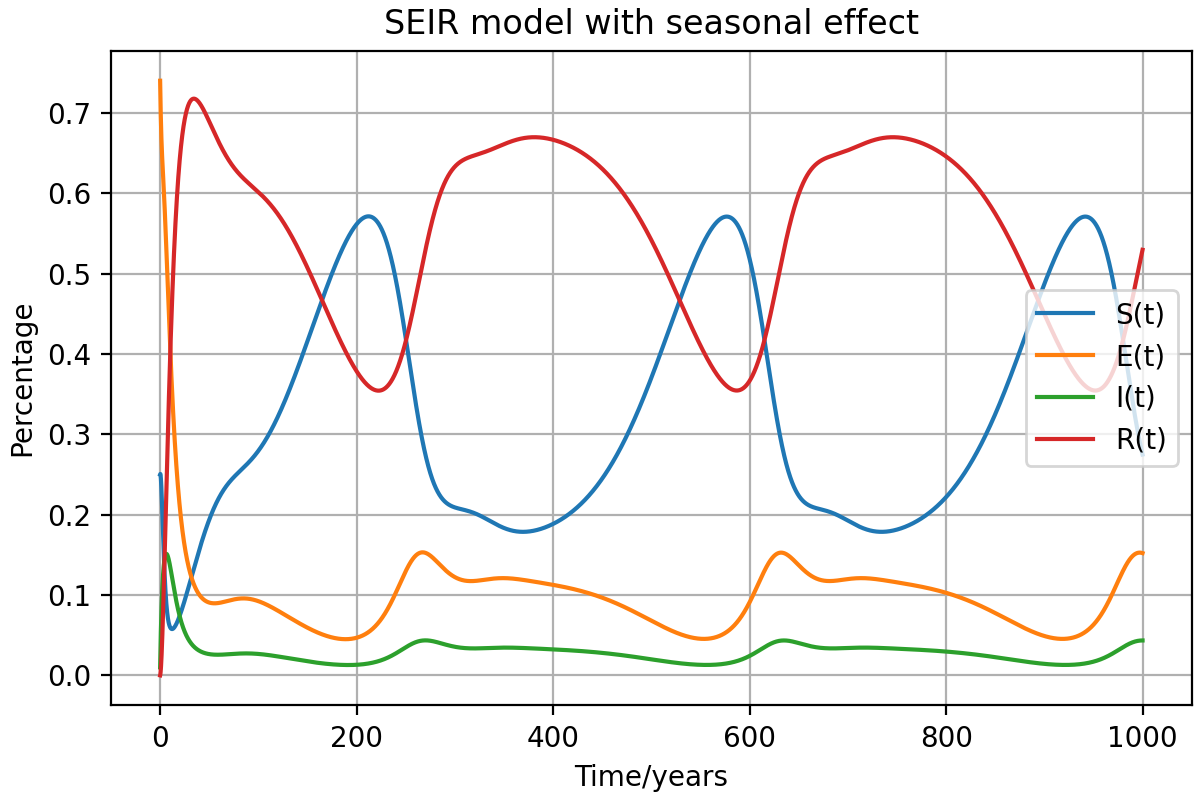

In [47]:
plt.figure(figsize=(6, 4),constrained_layout=True)
plt.plot(t,S ,label='S(t)')
plt.plot(t,E ,label='E(t)')
plt.plot(t,I ,label='I(t)')
plt.plot(t,R ,label='R(t)')
plt.title('SEIR model with seasonal effect')
plt.xlabel('Time/years')
plt.ylabel('Percentage')
plt.legend(loc='right')
plt.grid()
plt.show()
